# 2015 FINA World Championships
-------------------------------------------------------------------------------------------------------------------


*   The case study explores data from the 2013 and 2015 FINA World Aquatics Championships, where the analysis will quantify the relative speeds and variability among swimmers
*  EDA, parameter estimation, and hypothesis testing are performed in the dataset 




 

## **1. Background Details**
- There are 10 lanes in the pool with 0 indexing i.e. 0-9.
- Only 1-8 lanes are used for the competition purpose.
- The pool is 50m longs
-Strokes	at	the	World	Championships
    1. Freestyle
    2. Breaststroke
    3. Butterfly
    4. Backstroke

- Events at	the	World	Championships : 
    1. For longer events we have Heats: Firt round, Finals: The final round
    2. For shorter events we have Heats: First round, Semifinals: Penultimate round, Finals: The final round
- DataSourcse: 
  The data is openly available at omegatiming.com


In [0]:
# importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import dc_stat_think as dcst
from IPython.display import Image
%matplotlib inline 

**Getting the data**

In [0]:
fina_2015 = pd.read_csv('datasets/2015_FINA.csv',comment='#')
fina_2013 = pd.read_csv('datasets/2015_FINA.csv',comment='#')
df = pd.read_csv('datasets/df.csv')

In [0]:
fina_2015.head()

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,...,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,1,29.63,50,930.0,PRE,100,1,FLY,29.63
1,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,2,63.65,100,930.0,PRE,100,1,FLY,34.02
2,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,1,31.33,50,1014.0,PRE,200,1,FLY,31.33
3,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,2,66.81,100,1014.0,PRE,200,1,FLY,35.48
4,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,3,103.29,150,1014.0,PRE,200,1,FLY,36.48


In [0]:
fina_2015.columns

Index(['athleteid', 'lastname', 'firstname', 'birthdate', 'gender', 'name',
       'code', 'eventid', 'heat', 'lane', 'points', 'reactiontime', 'swimtime',
       'split', 'cumswimtime', 'splitdistance', 'daytime', 'round', 'distance',
       'relaycount', 'stroke', 'splitswimtime'],
      dtype='object')

In [0]:
fina_2015.gender.value_counts()

M    6187
F    5236
Name: gender, dtype: int64

In [0]:
fina_2015.stroke.value_counts()

FREE      6782
MEDLEY    1288
BREAST    1205
FLY       1095
BACK      1053
Name: stroke, dtype: int64

In [0]:
fina_2015.distance.value_counts()

200     2944
1500    2554
400     1805
100     1659
800     1601
50       860
Name: distance, dtype: int64

In [0]:
fina_2015.heat.value_counts()

1     3181
2     2297
3     1838
4     1561
5     1317
6      439
7      386
8      167
9      100
10      58
11      40
12      39
Name: heat, dtype: int64

In [0]:
fina_2015['round'].value_counts()

PRE    8904
FIN    1475
SEM    1022
SOS      18
SOP       4
Name: round, dtype: int64

In [0]:
mens_200_free_heats = fina_2015[(fina_2015.gender=='M')&(fina_2015.distance==200)&(fina_2015.stroke=='FREE')&(fina_2015['round']=='PRE')&(fina_2015.splitdistance==200)]['swimtime'].values

**Graphical EDA of men's 200 free heats**
In the heats, all contestants swim, the very fast and the very slow. To explore how the swim times are distributed, plot an ECDF of the men's 200 freestyle.

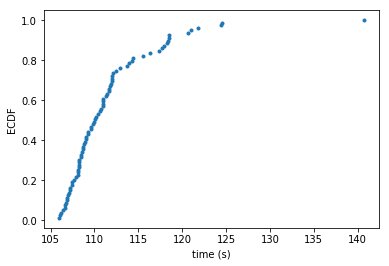

In [0]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
_ = plt.plot(x,y,marker='.',linestyle='none')

# Label axes and show plot
_ = plt.xlabel('time (s)')
_ = plt.ylabel('ECDF')
plt.show()

We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one very slow swimmer.

**200 m free time with confidence interval**

Now, we will practice parameter estimation and computation of confidence intervals by computing the mean and median swim time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of swim times, such as the slow swimmers in the heats.

In [0]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats,np.mean,size=10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats,np.median,size=10000)


# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean,[2.5,97.5])
conf_int_median = np.percentile(bs_reps_median,[2.5,97.5])
# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.50, 112.89] sec.

median time: 110.04 sec.
95% conf int of median: [108.96, 111.29] sec.



 Indeed, the mean swim time is longer than the median because of the effect of the very slow swimmers.

**Question: Do individual female swimmers swim faster in finals than in semifinals?**
Events : 50, 100, 200 meter freestyle, breststroke, butterfly, backstroke

Metric for calculation: 
Fractional improvement = (semifinal time - final time)/semifinal time

Improved Questions*

**1.Question: What is the fractional improvement of individual female swimmers from the semifinals to finals?**

**2.Question: Is observed fractionl improvement commensurate with there being no difference in performance in the semifinals and finals**


EDA: finals versus semifinals

In [0]:
semi_times = df.semi_swimtime.values
final_times = df.final_swimtime.values

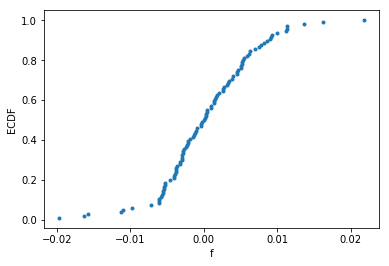

In [0]:
# Compute fractional difference in time between finals and semis
f = (semi_times - final_times) / semi_times

# Generate x and y values for the ECDF: x, y
x,y = dcst.ecdf(f)

# Make a plot of the ECDF
_ = plt.plot(x,y,marker='.',linestyle='none')

# Label axes and show plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')
plt.show()


The median of the ECDF is juuuust above zero. But at first glance, it does not look like there is much of any difference between semifinals and finals

**Parameter estimates of difference between finals and semifinals**

In [0]:
# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of mean: bs_reps
bs_reps = dcst.draw_bs_reps(f,np.mean,size=10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps,[2.5,97.5])

# Report
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))



mean frac. diff.: 0.00040
95% conf int of mean frac. diff.: [-0.00092, 0.00174]


It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the same.

**Permutation Test**
1. Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair.
2. Go through each array, and for each index, swap the entry in the respective final and semifinal array with a 50% probability.
3. Use the resulting final and semifinal arrays to compute f and then the mean of f.

**Plotting the Data**
You can see that there is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower split times.

In [0]:
def swap_random(a, b):
    """Randomly swap entries in two arrays."""
    # Indices to swap
    swap_inds = np.random.random(size=len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]

    return a_out, b_out

# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)

# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)

p = 0.287


 The p-value is large, about 0.27, which suggests that the results of the 2015 World Championships are consistent with there being no difference in performance between the finals and semifinals.

#### How does the performance of swimmers decline over long events?50

Quantifying slowdown:
    1. Use Women's 800m freestyle heats
    2. Omit first and last 100m
    3. Compute mean split time for each split number
    4. Perform linear regression to get slowdown per split
    5. Perform hypothesis test: can the slowdown be explained by random variation?

Hypothesis for correlation:
    Null: Split time and Split number are completely uncorrelated
    Alternate: They are correlated
Test Statistic : Pearson Cofficient


In [0]:
splits = np.array([[35.04, 36.39, 35.92, 36.23, 36.67, 36.76, 36.48, 36.85, 36.92,
        36.68, 36.97, 36.98],
       [34.14, 34.22, 33.67, 33.88, 34.15, 33.91, 34.41, 33.92, 34.36,
        34.38, 34.6 , 34.45],
       [31.8 , 31.91, 31.95, 32.04, 31.95, 31.65, 31.57, 31.39, 31.61,
        31.43, 31.46, 31.47],
       [33.16, 32.9 , 32.68, 32.84, 33.55, 33.74, 33.71, 33.6 , 33.71,
        33.12, 33.14, 32.79],
       [32.97, 32.83, 32.99, 32.94, 33.19, 33.6 , 33.72, 33.74, 33.82,
        33.67, 33.86, 33.59],
       [34.6 , 34.57, 34.62, 34.96, 35.1 , 35.22, 35.63, 35.56, 35.43,
        35.67, 35.26, 35.42],
       [32.18, 32.17, 32.15, 32.16, 32.31, 32.27, 32.32, 32.23, 32.42,
        32.34, 32.32, 32.27],
       [32.4 , 32.14, 32.46, 32.43, 32.58, 32.46, 32.6 , 32.42, 32.79,
        32.33, 32.47, 32.63],
       [32.67, 32.54, 32.48, 32.42, 32.55, 32.45, 32.94, 33.03, 33.12,
        33.47, 33.42, 33.48],
       [33.76, 34.95, 34.76, 35.45, 34.99, 36.11, 35.27, 35.82, 35.48,
        36.12, 35.2 , 36.07],
       [32.57, 32.7 , 32.53, 32.73, 32.84, 32.7 , 32.75, 33.07, 33.01,
        33.11, 33.17, 33.02],
       [35.04, 34.69, 34.24, 34.07, 34.47, 34.39, 34.98, 34.56, 35.3 ,
        34.9 , 35.03, 34.08],
       [32.61, 32.97, 33.09, 33.19, 33.72, 33.92, 34.12, 33.82, 34.07,
        34.22, 34.26, 34.07],
       [31.01, 31.49, 31.38, 31.47, 31.58, 31.56, 31.68, 31.68, 32.09,
        31.83, 32.25, 31.67],
       [32.29, 32.36, 32.43, 32.56, 32.84, 32.73, 32.77, 32.78, 32.91,
        33.15, 33.19, 33.32],
       [31.92, 32.14, 31.87, 32.02, 31.84, 32.47, 32.17, 32.73, 32.45,
        33.16, 33.01, 33.08],
       [32.1 , 32.47, 32.32, 32.84, 32.38, 32.93, 32.36, 32.96, 32.72,
        33.35, 32.95, 33.77],
       [35.97, 35.96, 36.09, 36.  , 36.59, 36.55, 36.4 , 36.58, 36.89,
        36.69, 36.81, 36.73],
       [31.69, 31.56, 31.76, 31.43, 31.69, 31.77, 31.88, 31.66, 31.96,
        31.87, 31.66, 31.73],
       [31.71, 32.23, 31.89, 32.31, 32.01, 32.62, 32.12, 33.  , 32.63,
        33.14, 32.55, 33.39],
       [31.99, 31.94, 31.82, 32.02, 31.71, 32.  , 31.79, 31.87, 31.97,
        32.15, 32.09, 32.3 ],
       [31.88, 31.78, 31.67, 31.68, 31.97, 31.7 , 31.71, 31.87, 31.91,
        32.  , 31.83, 32.13],
       [32.49, 32.32, 32.77, 32.8 , 32.87, 32.85, 32.89, 33.  , 33.12,
        32.86, 33.05, 32.75],
       [31.99, 31.93, 31.76, 31.85, 31.95, 31.82, 31.64, 31.49, 31.78,
        31.67, 32.28, 31.85],
       [32.19, 32.32, 32.55, 32.74, 32.59, 32.94, 32.75, 33.09, 32.91,
        33.53, 33.06, 33.  ],
       [32.37, 32.62, 32.38, 33.07, 32.91, 33.45, 32.97, 33.38, 33.24,
        33.33, 32.93, 32.53],
       [32.8 , 33.38, 33.18, 33.78, 33.78, 34.32, 34.1 , 34.88, 33.97,
        34.96, 34.44, 34.93],
       [34.9 , 35.03, 35.25, 35.42, 35.88, 35.63, 35.63, 35.66, 35.45,
        35.66, 35.39, 35.34],
       [32.67, 32.3 , 32.4 , 32.48, 32.52, 32.59, 32.73, 32.67, 32.97,
        32.7 , 32.87, 32.82],
       [32.68, 33.02, 32.8 , 32.94, 33.28, 33.46, 33.2 , 33.42, 33.14,
        33.36, 33.38, 33.31],
       [33.96, 33.93, 33.62, 33.76, 33.31, 33.7 , 33.02, 33.66, 33.57,
        33.37, 33.91, 33.92],
       [32.36, 32.6 , 32.12, 32.67, 32.56, 32.91, 32.84, 33.17, 32.95,
        33.44, 33.25, 33.59],
       [31.69, 31.81, 31.99, 31.99, 32.01, 31.77, 31.67, 31.62, 31.66,
        31.82, 31.63, 31.72],
       [36.95, 37.44, 36.96, 37.12, 37.51, 37.07, 37.49, 36.66, 36.84,
        37.11, 37.55, 37.6 ],
       [32.61, 32.92, 32.74, 32.88, 33.16, 33.21, 33.2 , 33.13, 33.04,
        33.09, 33.31, 33.45],
       [31.01, 31.5 , 31.29, 31.59, 31.77, 31.67, 31.79, 31.94, 32.  ,
        31.98, 32.1 , 32.03],
       [33.66, 33.92, 33.99, 34.21, 33.99, 34.16, 34.22, 34.44, 34.11,
        34.37, 34.43, 34.33],
       [32.91, 33.59, 33.56, 33.96, 34.83, 34.98, 35.43, 35.09, 35.94,
        35.99, 36.16, 35.74],
       [33.23, 34.1 , 33.87, 34.28, 34.23, 34.37, 34.19, 34.38, 34.23,
        34.48, 34.34, 34.4 ],
       [32.34, 32.3 , 32.13, 32.4 , 32.74, 32.57, 32.81, 32.92, 32.89,
        32.92, 33.01, 32.73],
       [30.77, 31.1 , 31.2 , 31.36, 31.31, 31.44, 31.31, 31.7 , 31.75,
        31.64, 31.86, 31.97],
       [31.9 , 31.98, 32.04, 31.98, 31.97, 31.83, 32.04, 31.92, 32.02,
        31.96, 32.07, 31.99],
       [32.39, 32.13, 32.24, 32.28, 32.17, 32.22, 32.1 , 32.25, 32.4 ,
        32.55, 32.64, 32.48]])
split_number = np.array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

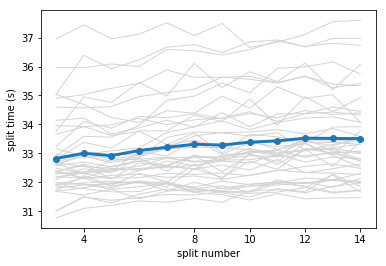

In [0]:
# Plot the splits for each swimmer
for splitset in splits:
    _ = plt.plot(split_number, splitset, lw=1, color='lightgray')

# Compute the mean split times
mean_splits = np.mean(splits,axis=0)

# Plot the mean split times
_ = plt.plot(split_number, mean_splits, marker='.', linewidth=3, markersize=12)

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

**Linear regression of average split time**

We will assume that the swimmers slow down in a linear fashion over the course of the 800 m event. The slowdown per split is then the slope of the mean split time versus split number plot.

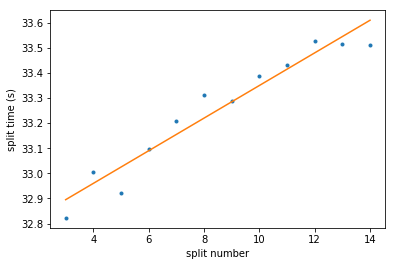


mean slowdown: 0.065 sec./split
95% conf int of mean slowdown: [0.051, 0.079] sec./split


In [0]:
# Perform regression
slowdown, split_3 = np.polyfit(split_number,mean_splits,1)

# Compute pairs bootstrap
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number,mean_splits,size=10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps,[2.5,97.5])

# Plot the data with regressions line
_ = plt.plot(split_number, mean_splits, marker='.', linestyle='none')
_ = plt.plot(split_number, split_number * slowdown + split_3, '-')

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% conf int of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(
    slowdown, *conf_int))


There is a small (about 6 hundreths of a second), but discernible, slowdown per split.

**Hypothesis test: are they slowing down?**

Now we will test the null hypothesis that the swimmer's split time is not at all correlated with the distance they are at in the swim. We will use the Pearson correlation coefficient as the test statistic.

In [0]:
# Observed correlation
rho = dcst.pearson_r(split_number,mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number,mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)


p = 0.0


The tiny effect is very real! With 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do not change speed as the race progresses.